In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv


My first attempt at creating a model from start to finish to predict ratings for a shopping website. 

Process of making the model:
1) Pre-processing
    * Data Cleaning
    * Train-test split
    * Feature engineering
2) Model selection and fitting
3) Model Validation
4) Hyper-parameter tuning (probably will not do this time due to lack of knowledge)

# Part 1: Data Cleaning

In [303]:
df = pd.read_csv("/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [304]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [305]:
df.drop_duplicates(subset = "Customer ID", inplace=True)

In [306]:
df.shape # Same dimensions as earlier -> No duplicates

(3900, 19)

In [307]:
df.drop(columns="Customer ID", inplace=True)
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [308]:
df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [309]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

In [310]:
df["Payment Method"].value_counts()

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

In [311]:
df["Shipping Type"].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

**Part 1 Results:**
There seem to be no duplicate names in any of the nominal variables (Item Purchased, Payment Method, Shipping Type) as well as no missing values.

In this case, I'm going to use "Review Rating" as the dependent variable. None of the other variables seem to be directly connected to the review rating, and there seems to be no target leakage as well (as none of the columns seem to have information that happens after the person's review that would mess up the results later). 

Before splitting the dataset, I'm going to do some data analysis to try and identify a few trends between the independent and dependent variables using matplotlib.

# Part 2: Exploratory Data Analysis

Possible columns with connections to "Review Rating"
* Purchase Amount (USD) (affects satisfaction)
* Payment Method (payment method may affect ease of purchasing item)
* Subscription status (affects ease of purchasing item / overall satisfaction with the website)
* Discount Applied (may affect percieved value of the purchase)
* Promo code applied (may affect percieved value of the purchase)

In [312]:
# Review Rating vs Purchase Amount

pa_rr = df[["Review Rating", "Purchase Amount (USD)"]]
corr = pa_rr.corr()
corr

,Review Rating,Purchase Amount (USD)
Review Rating,1.000000,0.030776
Purchase Amount (USD),0.030776,1.000000


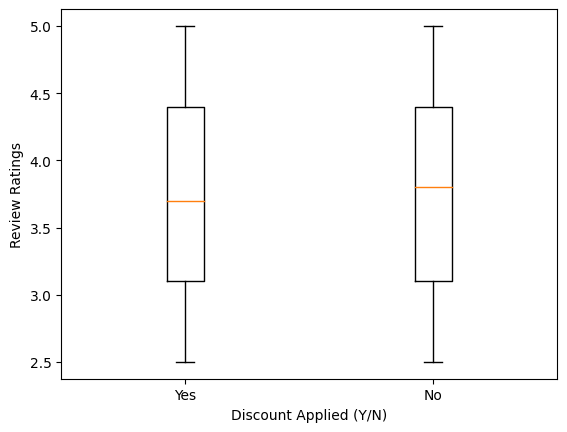

In [313]:
data = [df["Review Rating"].loc[df["Discount Applied"] == "Yes"],
        df["Review Rating"].loc[df["Discount Applied"] == "No"]]
plt.boxplot(data, labels = ["Yes", "No"])
plt.xlabel("Discount Applied (Y/N)")
plt.ylabel("Review Ratings")
plt.show()

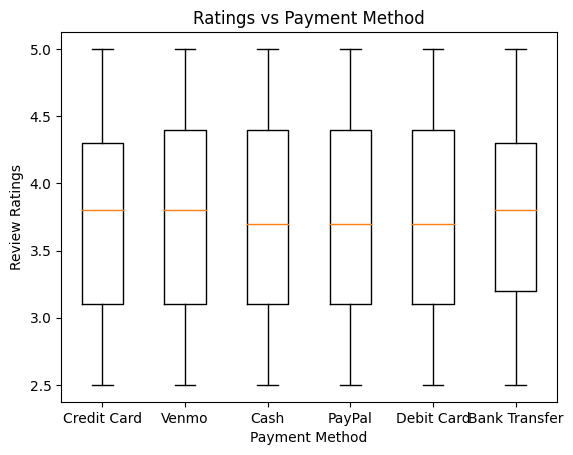

In [314]:
cols = ["Credit Card", "Venmo", "Cash", "PayPal", "Debit Card", "Bank Transfer"]
data = [df["Review Rating"].loc[df["Payment Method"] == x] for x in cols]
plt.boxplot(data, labels = cols)
plt.xlabel("Payment Method")
plt.ylabel("Review Ratings")
plt.title("Ratings vs Payment Method")
plt.show()

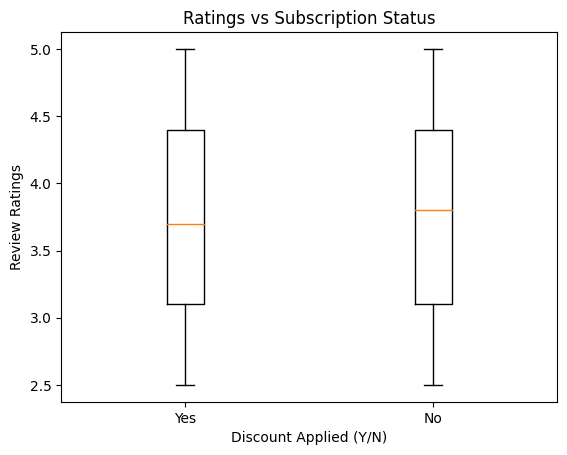

In [315]:
data = [df["Review Rating"].loc[df["Subscription Status"] == "Yes"],
        df["Review Rating"].loc[df["Subscription Status"] == "No"]]
plt.boxplot(data, labels = ["Yes", "No"])
plt.xlabel("Discount Applied (Y/N)")
plt.ylabel("Review Ratings")
plt.title("Ratings vs Subscription Status")
plt.show()

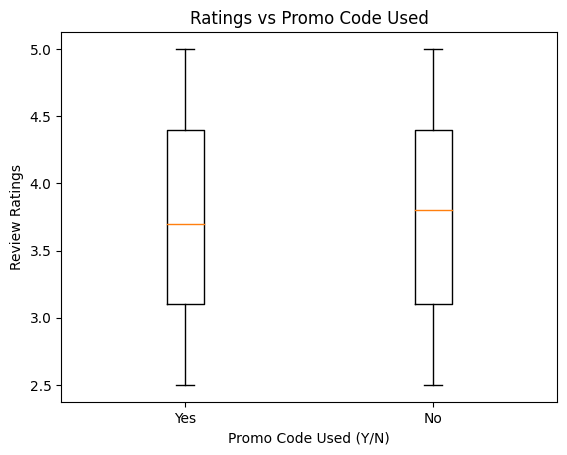

In [316]:
data = [df["Review Rating"].loc[df["Promo Code Used"] == "Yes"],
        df["Review Rating"].loc[df["Promo Code Used"] == "No"]]
plt.boxplot(data, labels = ["Yes", "No"])
plt.xlabel("Promo Code Used (Y/N)")
plt.ylabel("Review Ratings")
plt.title("Ratings vs Promo Code Used")
plt.show()

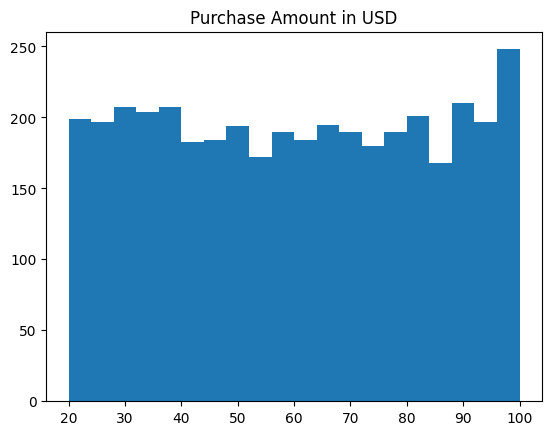

In [317]:
plt.hist(df["Purchase Amount (USD)"], bins=20)
plt.title("Purchase Amount in USD")
plt.show()

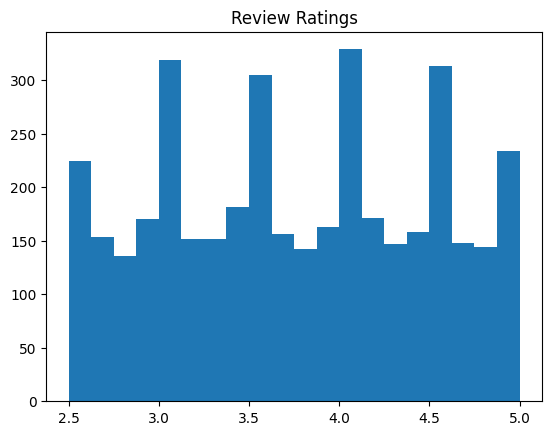

In [318]:
plt.hist(df["Review Rating"], bins=20)
plt.title("Review Ratings")
plt.show()

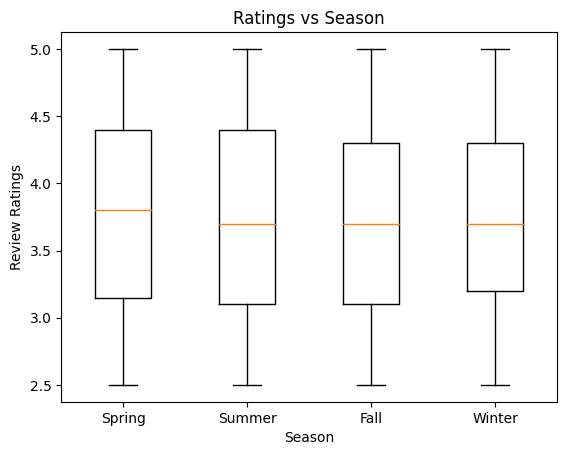

In [319]:
cols = ["Spring", "Summer", "Fall", "Winter"]
data = [df["Review Rating"].loc[df["Season"] == x] for x in cols]
plt.boxplot(data, labels = cols)
plt.xlabel("Season")
plt.ylabel("Review Ratings")
plt.title("Ratings vs Season")
plt.show()

In [320]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

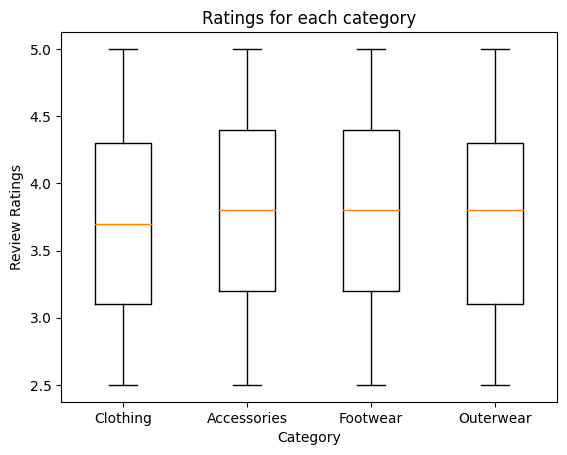

In [321]:
cols = ["Clothing", "Accessories", "Footwear", "Outerwear"]
data = [df["Review Rating"].loc[df["Category"] == x] for x in cols]
plt.boxplot(data, labels = cols)
plt.xlabel("Category")
plt.ylabel("Review Ratings")
plt.title("Ratings for each category")
plt.show()

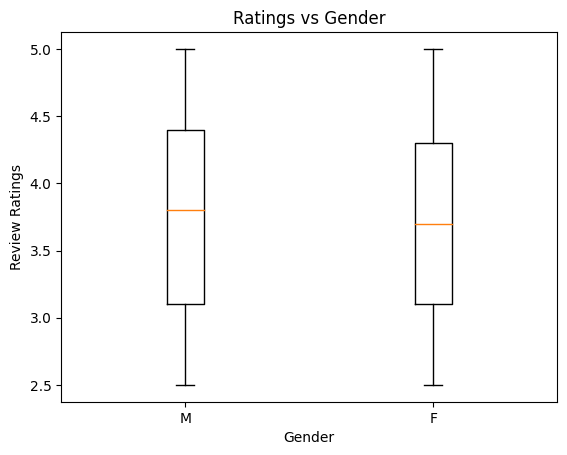

In [322]:
data = [df["Review Rating"].loc[df["Gender"] == "Male"],
        df["Review Rating"].loc[df["Gender"] == "Female"]]
plt.boxplot(data, labels = ["M", "F"])
plt.xlabel("Gender")
plt.ylabel("Review Ratings")
plt.title("Ratings vs Gender")
plt.show()

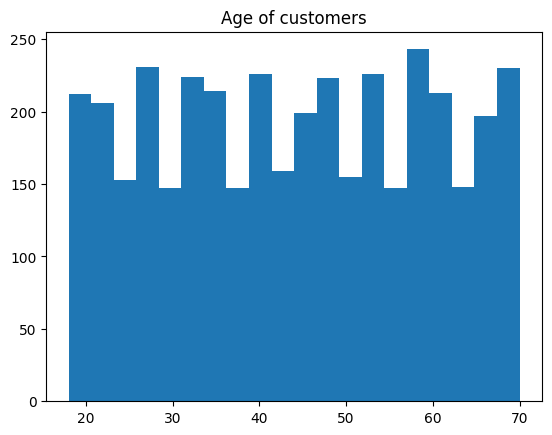

In [323]:
plt.hist(df["Age"], bins=20)
plt.title("Age of customers")
plt.show()

In [324]:
f'Minimum: {df["Previous Purchases"].min()}, Max: {df["Previous Purchases"].max()}'

'Minimum: 1, Max: 50'

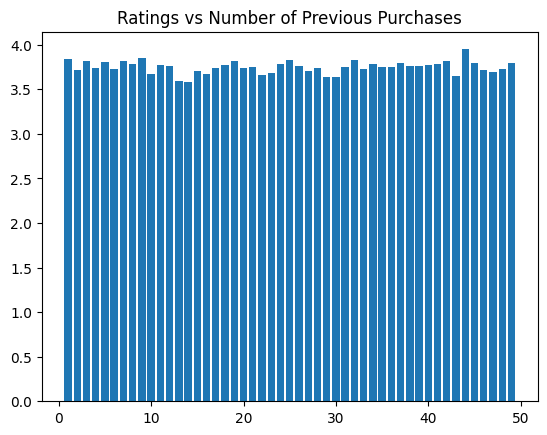

In [325]:
p = []
for z in range(1, 50):
    sum1 = df["Review Rating"].loc[df["Previous Purchases"] == z].sum()
    count1 = df["Review Rating"].loc[df["Previous Purchases"] == z].count()
    p.append(sum1/count1)

plt.bar(range(1, 50), p)
plt.title("Ratings vs Number of Previous Purchases")
plt.show()

In [326]:
df.shape

(3900, 18)

Although there aren't any outstanding correlations, there are a few small things that showed up.
* The median clothing item was rated slightly lower than other categories
* Reviews in the spring were just slightly more positive than other seasons
* Reviews were slightly positive when there were no discounts, promo codes, and no subscriptions to the website, which was the opposite of what I thought would happen.
* Using credit card, Venmo, or Bank Transfer were all around the same median rating for the respective products, while Cash, PayPal, and Debit Card were all slightly lower than the first three, being around the same level as each other.
* Men give slightly higher scores than women

Although none of them seemed notable, they could all still be useful variables in the model.

(Also earlier, I saw that there were twice as many men shopping. I haven't learned much about data generation or data balancing methods yet)

# Part 3: Feature engineering

I'll only make one new boolean variable that shows whether the person paid with their preferred payment method or not, which could change the ease of buying the product. 

In [327]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [328]:
df.loc[df["Payment Method"] == df["Preferred Payment Method"], "Same Payment Method"] = "Yes"
df.loc[df["Payment Method"] != df["Preferred Payment Method"], "Same Payment Method"] = "No"
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Same Payment Method
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,No
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,No
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,No
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,Yes
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,No
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,No
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,No
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,No


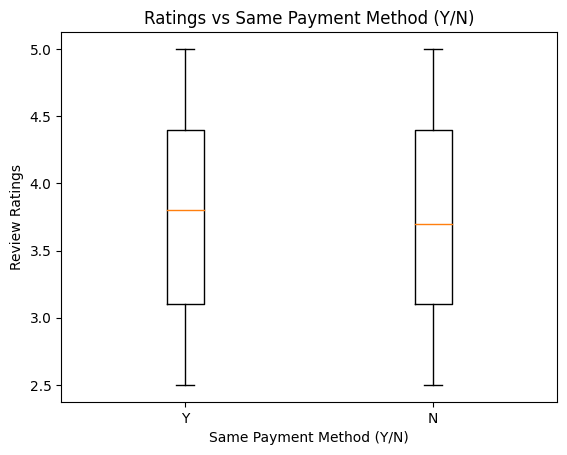

In [329]:
data = [df["Review Rating"].loc[df["Same Payment Method"] == "Yes"],
        df["Review Rating"].loc[df["Same Payment Method"] == "No"]]
plt.boxplot(data, labels = ["Y", "N"])
plt.xlabel("Same Payment Method (Y/N)")
plt.ylabel("Review Ratings")
plt.title("Ratings vs Same Payment Method (Y/N)")
plt.show()

It seems like using the same payment method does make the process smoother, which may cause those who use the same method to have a better experience and leave a better rating (unless confounding variables cause the difference in ratings).

# Part 3.5: Handling Categorical Variables (before decision tree)
I always forget that you can't pass in categorical variables into decision trees. 

Easily put into integer form: Gender, Category, Size, Subscription Status, Season, Discount Applied, Promo Code Used, Same Payment Method

More difficult to put into integer form: Item Purchased, Location, Color, Payment Method, Shipping Type

Already in integer form: Age, Review Rating

Not used: Purchase Amount (USD), Preferred Payment Method

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Co

In [331]:
df.loc[df["Gender"] == "Male", "Gender"] = 0
df.loc[df["Gender"] == "Female", "Gender"] = 1
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
3895    1
3896    1
3897    1
3898    1
3899    1
Name: Gender, Length: 3900, dtype: object

In [332]:
'''Gender, Category, Size, Subscription Status, Season, 
Discount Applied, Promo Code Used, Same Payment Method'''


# Category (1 - Clothing, 2 - Accessory, 3 - Footwear, 4 - Outerwear)
df.loc[df["Category"] == "Clothing", "Category"] = 1
df.loc[df["Category"] == "Accessories", "Category"] = 2
df.loc[df["Category"] == "Footwear", "Category"] = 3
df.loc[df["Category"] == "Outerwear", "Category"] = 4

# Size (1 - small, 2 - medium, 3 - large, 4 - XL)
df.loc[df["Size"] == "S", "Size"] = 1
df.loc[df["Size"] == "M", "Size"] = 2
df.loc[df["Size"] == "L", "Size"] = 3
df.loc[df["Size"] == "XL", "Size"] = 4

# Subscription Status (0 - No, 1 - Yes)
df.loc[df["Subscription Status"] == "No", "Subscription Status"] = 0
df.loc[df["Subscription Status"] == "Yes", "Subscription Status"] = 1

# Season (1 - Spring, 2 - Summer, 3 - Fall, 4 - Winter)
df.loc[df["Season"] == "Spring", "Season"] = 1
df.loc[df["Season"] == "Summer", "Season"] = 2
df.loc[df["Season"] == "Fall", "Season"] = 3
df.loc[df["Season"] == "Winter", "Season"] = 4

# Discount Applied (0 - No, 1 - Yes)
df.loc[df["Discount Applied"] == "No", "Discount Applied"] = 0
df.loc[df["Discount Applied"] == "Yes", "Discount Applied"] = 1

# Promo Code Used (0 - No, 1 - Yes)
df.loc[df["Promo Code Used"] == "No", "Promo Code Used"] = 0
df.loc[df["Promo Code Used"] == "Yes", "Promo Code Used"] = 1

# Same Payment Method (0 - No, 1 - Yes)
df.loc[df["Same Payment Method"] == "No", "Same Payment Method"] = 0
df.loc[df["Same Payment Method"] == "Yes", "Same Payment Method"] = 1



In [333]:
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Same Payment Method
0,55,0,Blouse,1,53,Kentucky,3,Gray,4,3.1,1,Credit Card,Express,1,1,14,Venmo,Fortnightly,0
1,19,0,Sweater,1,64,Maine,3,Maroon,4,3.1,1,Bank Transfer,Express,1,1,2,Cash,Fortnightly,0
2,50,0,Jeans,1,73,Massachusetts,1,Maroon,1,3.1,1,Cash,Free Shipping,1,1,23,Credit Card,Weekly,0
3,21,0,Sandals,3,90,Rhode Island,2,Maroon,1,3.5,1,PayPal,Next Day Air,1,1,49,PayPal,Weekly,1
4,45,0,Blouse,1,49,Oregon,2,Turquoise,1,2.7,1,Cash,Free Shipping,1,1,31,PayPal,Annually,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,1,Hoodie,1,28,Virginia,3,Turquoise,2,4.2,0,Cash,2-Day Shipping,0,0,32,Venmo,Weekly,0
3896,52,1,Backpack,2,49,Iowa,3,White,1,4.5,0,PayPal,Store Pickup,0,0,41,Bank Transfer,Bi-Weekly,0
3897,46,1,Belt,2,33,New Jersey,3,Green,1,2.9,0,Credit Card,Standard,0,0,24,Venmo,Quarterly,0
3898,44,1,Shoes,3,77,Minnesota,1,Brown,2,3.8,0,PayPal,Express,0,0,24,Venmo,Weekly,0


# Part 4: Splitting, Fitting, and Predictions

At this point, i'll split the data into testing and training as well as locating useful variables to use as predictors in the model

Dependent variable: "Review Rating"
Predictors:
* Age
* Gender
* Item Purchased
* Category
* Purchase Amount
* Location
* Size
* Color
* Season
* Subscription Status
* Payment Method
* Shipping Type
* Discount Applied
* Promo Code Used
* Frequency of purchase
* Same Payment Method

Variables left out:
* Previous Purchases (doesn't have a clear correlation with review rating)
* Preferred payment method (Isn't useful on its own)

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases',
       'Same Payment Method'],
      dtype='object')

In [336]:
X = df[['Age', 'Gender', 'Category', 'Size', 'Season',
       'Subscription Status', 'Discount Applied', 'Promo Code Used', 
        'Same Payment Method']]
y = df["Review Rating"]

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [340]:
from sklearn.tree import DecisionTreeRegressor

In [341]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [346]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [349]:
f"MSE: {mean_squared_error(model.predict(X_test), y_test)}, MAE: {mean_absolute_error(model.predict(X_test), y_test)}"

'MSE: 0.9874212369420703, MAE: 0.8136538461538461'

# Part 5: "Hyper-tuning" parameters
AKA changing number of nodes in decision tree to see what will help me the most.

In [356]:
nodes = [2, 4, 6, 8, 10, 20, 50, 100]
values = []

for x in nodes:
    model = DecisionTreeRegressor(max_leaf_nodes=x)
    model.fit(X_train, y_train)
    values.append({mean_absolute_error(model.predict(X_test), y_test)})

for i, v in enumerate(nodes):
    print(f"{nodes[i]}: {values[i]}")
    
    

2: {0.6230933757060101}
4: {0.6231118814275936}
6: {0.6229396276697711}
8: {0.6205582292340461}
10: {0.6231909605949106}
20: {0.6258619192697389}
50: {0.6288730533647091}
100: {0.6406517783541928}


In [358]:
maximum = df["Review Rating"].max()
minimum = df["Review Rating"].min()
f"Max: {maximum}, Min: {minimum}, Range: {maximum-minimum}"

'Max: 5.0, Min: 2.5, Range: 2.5'

**RESULTS:**
* Best result: +- 0.62 of the rating on average
* Maximum rating: 5
* Minimum rating: 2.5

# Part 6: Conclusions and future learning

1) Learn how to do more accurate EDA and use more than just box plots and histograms (AKA learn more Matplotlib)
2) Learn how to handle categorical variables better when using a model such as a decision tree which doesn't use categorical variables
3) Learn more hyper-parameters for Decision Trees and eventually learn about other models